In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
# from scipy import stats
# from scipy.special import beta as beta_function
plt.style.use(['dark_background', 'science', 'notebook'])
import ipywidgets as widgets

# 1. Monte Carlo evolution of the Markov chain

In [187]:
# transition matrix
T3 = np.array([[0.2, 0.3, 0.5], 
               [0.6, 0.0, 0.0],
               [0.2, 0.7, 0.5]])

T4 = np.array([[0.0, 0.7, 0.3, 0.0],
               [0.2, 0.0, 0.6, 0.2],
               [0.6, 0.0, 0.0, 0.4],
               [0.0, 1.0, 0.0, 0.0]]).T

In [188]:
T4

array([[0. , 0.2, 0.6, 0. ],
       [0.7, 0. , 0. , 1. ],
       [0.3, 0.6, 0. , 0. ],
       [0. , 0.2, 0.4, 0. ]])

In [94]:
def next_state3(state_now):
    if state_now==1:
        next_stt = np.random.choice([1,2,3], p=T3[:,0])
    elif state_now==2:
        next_stt = np.random.choice([1,2,3], p=T3[:,1])
    else:
        next_stt = np.random.choice([1,2,3], p=T3[:,2])
    return next_stt

def next_state4(state_now):
    if state_now==0:
        next_stt = np.random.choice([0,1,2,3], p=T4[:,0], replace=True)
    elif state_now==1:
        next_stt = np.random.choice([0,1,2,3], p=T4[:,1], replace=True)
    elif state_now==2:
        next_stt = np.random.choice([0,1,2,3], p=T4[:,2], replace=True)
    else:
        next_stt = np.random.choice([0,1,2,3], p=T4[:,3], replace=True)
    return next_stt

In [23]:
n_steps = 10000
for initial_state in [0,1,2,3]:
# for initial_state in [1]:
    counter = {0:0, 1:0, 2:0, 3:0}
    state = initial_state
    print(f'initial_state: {initial_state}')
    counter[state] += 1
    p0, p1, p2, p3, state_seq = [], [], [], [], []
    np.random.seed(420)
    print(counter)
    for step in range(n_steps):
        # print(state, end=' ')
        state_seq.append(state)
        p0.append(counter[0]/(step+1))
        p1.append(counter[1]/(step+1))
        p2.append(counter[2]/(step+1))
        p3.append(counter[3]/(step+1))
        # move to next step
        # state = next_state3(state)
        state = next_state4(state)
        counter[state] += 1
    if initial_state==0:
        probs_init0 = [p0,p1,p2,p3]
        print(p0[-1], p1[-1], p2[-1], p3[-1])
    elif initial_state==1:
        probs_init1 = [p0,p1,p2,p3]
        print(p0[-1], p1[-1], p2[-1], p3[-1])
    elif initial_state==2:
        probs_init2 = [p0,p1,p2,p3]
        print(p0[-1], p1[-1], p2[-1], p3[-1])
    else:
        probs_init3 = [p0,p1,p2,p3]
        print(p0[-1], p1[-1], p2[-1], p3[-1])
    print()

initial_state: 0
{0: 1, 1: 0, 2: 0, 3: 0}
0.2291 0.332 0.2678 0.1711

initial_state: 1
{0: 0, 1: 1, 2: 0, 3: 0}
0.2291 0.332 0.2678 0.1711

initial_state: 2
{0: 0, 1: 0, 2: 1, 3: 0}
0.2291 0.3319 0.2679 0.1711

initial_state: 3
{0: 0, 1: 0, 2: 0, 3: 1}
0.229 0.332 0.2678 0.1712



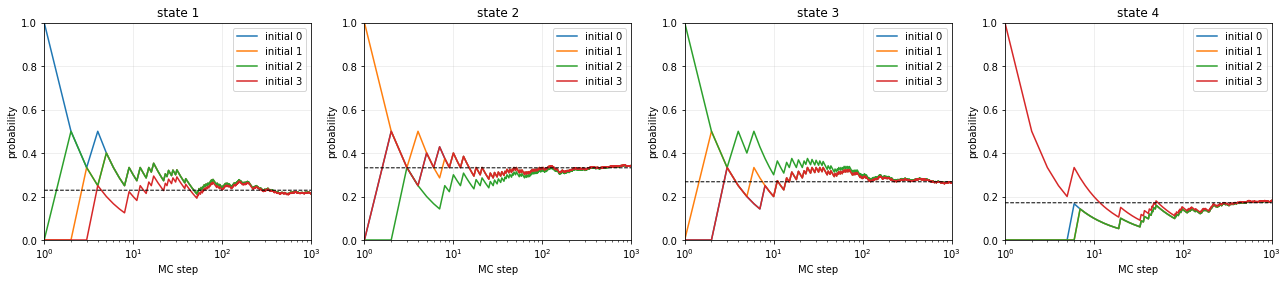

In [24]:
fig, axs = plt.subplots(ncols=4, figsize=(22, 4))


xmin, xmax = 1, 1e3#n_steps+1
ymin, ymax = 0, 1
x_axis = np.linspace(1, n_steps, n_steps)
for i, ax in enumerate(axs.flat):
    ax.plot(x_axis, probs_init0[i], label=f'initial 0')# color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
    ax.plot(x_axis, probs_init1[i], label=f'initial 1')# color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
    ax.plot(x_axis, probs_init2[i], label=f'initial 2')# color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
    ax.plot(x_axis, probs_init3[i], label=f'initial 3')# color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
    

    ax.set(xlabel='MC step', ylabel='probability', title=f'state {i+1}', xlim=[xmin,xmax], ylim=[ymin,ymax], xscale='log')
    ax.grid(lw=1, alpha=0.2, zorder=0)
    ax.legend();
axs[0].plot(x_axis, [0.229]*n_steps, '--', c='k', lw=1)
axs[1].plot(x_axis, [0.332]*n_steps, '--', c='k', lw=1)
axs[2].plot(x_axis, [0.2678]*n_steps, '--', c='k', lw=1)
axs[3].plot(x_axis, [0.1712]*n_steps, '--', c='k', lw=1);

In [315]:
import matplotlib.ticker as plticker

In [437]:
def MC_state(n=0, max_steps=15, stationary_probabilities=False):
    N = 1
    initial_state = np.array([1,1,1,1])/4
    state = initial_state
    p0, p1, p2, p3 = [],[],[],[]
    np.random.seed(420)
    n_steps = n
    for step in range(n_steps+1):
        p0.append(state[0])
        p1.append(state[1])
        p2.append(state[2])
        p3.append(state[3])
        state = np.dot(T4, state)
        
    fig, ax = plt.subplots(figsize=(8, 5))
    xmin, xmax = -0.5, max_steps+0.5
    ymin, ymax = -0.01, 0.5
    x_axis = np.linspace(0, n_steps, n_steps+1)
    ax.plot(x_axis, p0, 'o-', lw=1, label=fr'$s_0$', c='y')
    ax.plot(x_axis, p1, 'o-', lw=1, label=fr'$s_1$', c='limegreen')
    ax.plot(x_axis, p2, 'o-', lw=1, label=fr'$s_2$', c='red')
    ax.plot(x_axis, p3, 'o-', lw=1, label=fr'$s_3$', c='magenta')
    ax.set(xlabel='step', ylabel='probability', xlim=[xmin,xmax], ylim=[ymin,ymax])
    ax.grid(lw=1, alpha=0.2, zorder=0)
    ax.xaxis.set_major_locator(plticker.MultipleLocator(base=int(max_steps/10)))
    # ax.set_xticks(ax.get_xticks()[::1])
    ax.legend(ncol=2);
    if stationary_probabilities:
        ax.plot([0, xmax], [0.2290, 0.2290], '--', lw=1, zorder=0, c='y')
        ax.plot([0, xmax], [0.3320, 0.3320], '--', lw=1, zorder=0, c='limegreen')
        ax.plot([0, xmax], [0.2678, 0.2678], '--', lw=1, zorder=0, c='r')
        ax.plot([0, xmax], [0.1712, 0.1712], '--', lw=1, zorder=0, c='magenta');

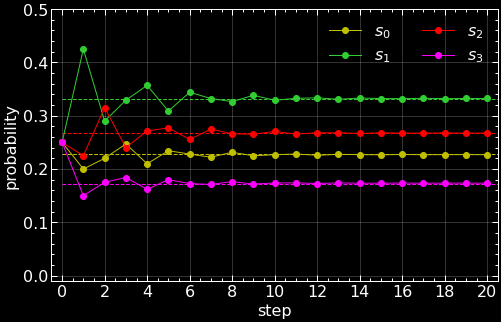

In [438]:
MC_state(n=20, max_steps=20, stationary_probabilities=1)

In [439]:
max_steps = 22
widgets.interact(MC_state, n=(0, max_steps, 1), max_steps=widgets.fixed(max_steps))

interactive(children=(IntSlider(value=0, description='n', max=22), Checkbox(value=False, description='stationa…

<function __main__.MC_state(n=0, max_steps=15, stationary_probabilities=False)>

# 2. Transition matrix

In [23]:
# transition matrix
T = np.array([[0.2, 0.3, 0.5], 
              [0.6, 0.0, 0.0],
              [0.2, 0.7, 0.5]])

# initial probability distribution: pure state 2
x0 = np.array([[0], 
               [1],
               [0]])

In [24]:
np.dot(T,x0)

array([[0.3],
       [0. ],
       [0.7]])

In [25]:
np.dot(T, np.dot(T,x0) )

array([[0.41],
       [0.18],
       [0.41]])

In [286]:
n_steps = 10
xn = x0
for i in range(n_steps):
    print('step', i, xn.T)
    xn = np.round(np.dot(T, xn), 2)

step 0 [[0 1 0]]
step 1 [[0.3 0.  0.7]]
step 2 [[0.41 0.18 0.41]]
step 3 [[0.34 0.25 0.41]]
step 4 [[0.35 0.2  0.45]]
step 5 [[0.36 0.21 0.43]]
step 6 [[0.35 0.22 0.43]]
step 7 [[0.35 0.21 0.44]]
step 8 [[0.35 0.21 0.44]]
step 9 [[0.35 0.21 0.44]]


In [33]:
np.linalg.eig(T)

(array([ 1.  +0.j       , -0.15+0.3122499j, -0.15-0.3122499j]),
 array([[-0.58746336+0.j        , -0.16984156+0.35355339j,
         -0.16984156-0.35355339j],
        [-0.35247801+0.j        ,  0.67936622+0.j        ,
          0.67936622-0.j        ],
        [-0.72845456+0.j        , -0.50952467-0.35355339j,
         -0.50952467+0.35355339j]]))

# 3. Stationary probability distribution

In [75]:
from numpy.linalg import eig as eigenvectors

In [76]:
eigenvectors(T)

(array([ 1.  +0.j       , -0.15+0.3122499j, -0.15-0.3122499j]),
 array([[-0.58746336+0.j        , -0.16984156+0.35355339j,
         -0.16984156-0.35355339j],
        [-0.35247801+0.j        ,  0.67936622+0.j        ,
          0.67936622-0.j        ],
        [-0.72845456+0.j        , -0.50952467-0.35355339j,
         -0.50952467+0.35355339j]]))

In [77]:
eigenvalues, eigenvectors = eigenvectors(T)
eigenvalues

array([ 1.  +0.j       , -0.15+0.3122499j, -0.15-0.3122499j])

In [78]:
eigenvectors = np.round(eigenvectors, 2)
eigenvectors

array([[-0.59+0.j  , -0.17+0.35j, -0.17-0.35j],
       [-0.35+0.j  ,  0.68+0.j  ,  0.68-0.j  ],
       [-0.73+0.j  , -0.51-0.35j, -0.51+0.35j]])

In [79]:
eigenvector1 = eigenvectors[:,0].real
eigenvector1 /= np.sum(eigenvector1)
eigenvector1 = np.round(eigenvector1, 2)
eigenvector1

array([0.35, 0.21, 0.44])